<a href="https://colab.research.google.com/github/zhujunqing1996/2021-TAMU-datathon/blob/main/ENVIRONMENT_DATA_ATLAS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [15]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline
import warnings
from collections import Counter
warnings.filterwarnings('ignore')
from sklearn import metrics

In [16]:
df = pd.read_csv('https://raw.githubusercontent.com/zhujunqing1996/2021-TAMU-datathon/main/DATASET_atlas_top20%20countries.csv')

# only use the data from US

In [17]:
df = df[df['Country ISO Code'] == 'US']
df.head()

,Dataset,Path,Country,Country ISO Code,Topic,Subtopic,Indicator,Description,Source,Uri,Year,Month,Unit,Date,Value
900,EDGARED2019,location=US;indicator=KN.F1;type=All;Frequency=A,United States of America,US,Environment,NaN,CO2 emissions,Carbon dioxide emissions are those stemming fr...,EDGAR,https://knoema.com/atlas/United-States-of-Amer...,1970,1,Mton CO2,1970-01-01,4685.42942
901,EDGARED2019,location=US;indicator=KN.F1;type=All;Frequency=A,United States of America,US,Environment,NaN,CO2 emissions,Carbon dioxide emissions are those stemming fr...,EDGAR,https://knoema.com/atlas/United-States-of-Amer...,1971,1,Mton CO2,1971-01-01,4550.80871
902,EDGARED2019,location=US;indicator=KN.F1;type=All;Frequency=A,United States of America,US,Environment,NaN,CO2 emissions,Carbon dioxide emissions are those stemming fr...,EDGAR,https://knoema.com/atlas/United-States-of-Amer...,1972,1,Mton CO2,1972-01-01,4799.58289
903,EDGARED2019,location=US;indicator=KN.F1;type=All;Frequency=A,United States of America,US,Environment,NaN,CO2 emissions,Carbon dioxide emissions are those stemming fr...,EDGAR,https://knoema.com/atlas/United-States-of-Amer...,1973,1,Mton CO2,1973-01-01,4987.24848
904,EDGARED2019,location=US;indicator=KN.F1;type=All;Frequency=A,United States of America,US,Environment,NaN,CO2 emissions,Carbon dioxide emissions are those stemming fr...,EDGAR,https://knoema.com/atlas/United-States-of-Amer...,1974,1,Mton CO2,1974-01-01,4822.62093


In [18]:
# No 1: WB mt CO2 from gas solid liquid fuel
Indicator1 = ['CO2 emissions from gaseous fuel consumption', 'CO2 emissions from liquid fuel consumption', 'CO2 emissions from solid fuel consumption']
df_filter1 = df[(df['Dataset'] == 'WBWDI2019Jan') & (df['Year'] >= 1970) & (df['Indicator'].isin(Indicator1))]
print('The unit of the values are: {}, and needs to be changed into Mt.'.format(df_filter1['Unit'].unique()[0]))
df_1 = pd.crosstab(df_filter1.Year, df_filter1.Indicator, values = df_filter1.Value/1000, aggfunc = 'sum')
df_1['Total CO2 (Mt) from WBWDI2019Jan'] = df_1.sum(axis = 1)
df_1.reset_index(inplace = True)
df_1.head()

The unit of the values are: kt, and needs to be changed into Mt.


Indicator,Year,CO2 emissions from gaseous fuel consumption,CO2 emissions from liquid fuel consumption,CO2 emissions from solid fuel consumption,Total CO2 (Mt) from WBWDI2019Jan
0,1970,1060.078362,2039.750415,1169.046934,4268.875711
1,1971,1097.826460,2099.023803,1108.314080,4305.164343
2,1972,1116.586832,2271.031772,1125.761666,4513.380270
3,1973,1104.383056,2401.448627,1211.543797,4717.375480
4,1974,1053.030388,2301.790568,1197.260832,4552.081788


In [19]:
# No 2: EDG mt CO2
Indicator2 = ['CO2 emissions']
df_filter2 = df[(df['Dataset'] == 'EDGARED2019') & (df['Year'] >= 1970) & (df['Indicator'].isin(Indicator2))]
print('The unit of the values are: {}, and needs to be changed into Mt of CO2.'.format(df_filter2['Unit'].unique()[0]))
df_2 = pd.crosstab(df_filter2.Year, df_filter2.Indicator, values = df_filter2.Value, aggfunc = 'sum')
df_2['Total CO2 (Mt) from EDGARED2019'] = df_2.sum(axis = 1)
df_2.reset_index(inplace = True)
df_2.head()

The unit of the values are: Mton CO2, and needs to be changed into Mt of CO2.


Indicator,Year,CO2 emissions,Total CO2 (Mt) from EDGARED2019
0,1970,4685.42942,4685.42942
1,1971,4550.80871,4550.80871
2,1972,4799.58289,4799.58289
3,1973,4987.24848,4987.24848
4,1974,4822.62093,4822.62093


In [20]:
# No 3: CDI mt CO2 from different sectors
Indicator3 = ['CO2 emissions from bunker fuels', 'CO2 emissions from cement production', 'CO2 emissions from fossil-fuels', 'CO2 emissions from gas flaring']
df_filter3 = df[(df['Dataset'] == 'CDIACGNCO2015') & (df['Year'] >= 1970) & (df['Indicator'].isin(Indicator3))]
print('The unit of the values are: {}, and needs to be changed into Mt of CO2.'.format(df_filter3['Unit'].unique()[0]))
df_3 = pd.crosstab(df_filter3.Year, df_filter3.Indicator, values = df_filter3.Value/1000/12*44, aggfunc = 'sum').reset_index()
df_3['Total CO2 (Mt) from CDIACGNCO2015'] = df_3.sum(axis = 1)
df_3.head()

The unit of the values are: Thousand metric tons of carbon, and needs to be changed into Mt of CO2.


Indicator,Year,CO2 emissions from bunker fuels,CO2 emissions from cement production,CO2 emissions from fossil-fuels,CO2 emissions from gas flaring,Total CO2 (Mt) from CDIACGNCO2015
0,1970,48.656667,33.755333,4328.511000,26.268000,6407.191000
1,1971,46.838000,36.333000,4356.374000,15.271667,6425.816667
2,1972,46.141333,38.250667,4564.538000,13.317333,6634.247333
3,1973,53.584667,39.618333,4769.761333,13.196333,6849.160667
4,1974,53.075000,37.495333,4598.069667,8.906333,6671.546333


In [21]:
# No 4: WB % CO2 from different sectors
Indicator4 = ['CO2 emissions from electricity production (%)', 'CO2 emissions from manufacturing industries (%)', 'CO2 emissions from other sectors (%)', 'CO2 emissions: residential buildings (%)', 'CO2 emissions: transport (%)']
df_filter4 = df[(df['Dataset'] == 'WBWDI2019Jan') & (df['Year'] >= 1970) & (df['Indicator'].isin(Indicator4)) & (df['Country'] == 'United States of America')]
print('The unit of the values are: {}.'.format(df_filter4['Unit'].unique()[0]))
df_4 = pd.crosstab(df_filter4.Year, df_filter4.Indicator, values = df_filter4.Value, aggfunc = 'sum')
df_4['Total CO2 (%) from WBWDI2019Jan'] = df_4.sum(axis = 1)
df_4.reset_index(inplace = True)
df_4.head()

The unit of the values are: %.


Indicator,Year,CO2 emissions from electricity production (%),CO2 emissions from manufacturing industries (%),CO2 emissions from other sectors (%),CO2 emissions: residential buildings (%),CO2 emissions: transport (%),Total CO2 (%) from WBWDI2019Jan
0,1970,32.48665,22.80272,1.09926,19.02232,24.58928,100.00023
1,1971,33.00001,20.78338,1.81573,19.06140,25.33949,100.00001
2,1972,34.30646,20.12861,1.67131,18.39059,25.50304,100.00001
3,1973,35.55165,20.09723,1.58079,17.04822,25.72211,100.00000
4,1974,36.05384,19.49222,1.80745,16.68741,25.95908,100.00000


In [22]:
# No 5: WB Mt of CO2 equivalent of methane
Indicator5 = ['Methane emissions']
df_filter5 = df[(df['Dataset'] == 'WBWDI2019Jan') & (df['Year'] >= 1970) & (df['Indicator'].isin(Indicator5))]
print('The unit of the values are: {}, and needs to be changed into Mt.'.format(df_filter5['Unit'].unique()[0]))
df_5 = pd.crosstab(df_filter5.Year, df_filter5.Indicator, values = df_filter5.Value/1000, aggfunc = 'sum')
df_5['Total methane (Mt of CO2 equivalent) from WBWDI2019Jan'] = df_5.sum(axis = 1)
df_5.reset_index(inplace = True)
df_5.head()

The unit of the values are: kt of CO2 equivalent, and needs to be changed into Mt.


Indicator,Year,Methane emissions,Total methane (Mt of CO2 equivalent) from WBWDI2019Jan
0,1970,594.255,594.255
1,1971,579.493,579.493
2,1972,586.231,586.231
3,1973,589.314,589.314
4,1974,588.197,588.197


In [23]:
# No 6: CDI mt CO2 from gas solid liquid fuels
Indicator6 = ['CO2 emissions from gas fuel consumption', 'CO2 emissions from liquid fuel consumption', 'CO2 emissions from solid fuel consumption']
df_filter6 = df[(df['Dataset'] == 'CDIACGNCO2015') & (df['Year'] >= 1970) & (df['Indicator'].isin(Indicator6))]
print('The unit of the values are: {}, and needs to be changed into Mt of CO2.'.format(df_filter6['Unit'].unique()[0]))
df_6 = pd.crosstab(df_filter6.Year, df_filter6.Indicator, values = df_filter6.Value/1000/12*44, aggfunc = 'sum').reset_index()
df_6['Total CO2 (Mt) from CDIACGNCO2015'] = df_6.sum(axis = 1)
df_6.head()

The unit of the values are: Thousand metric tons of carbon, and needs to be changed into Mt of CO2.


Indicator,Year,CO2 emissions from gas fuel consumption,CO2 emissions from liquid fuel consumption,CO2 emissions from solid fuel consumption,Total CO2 (Mt) from CDIACGNCO2015
0,1970,1059.982000,2039.565000,1168.940667,6238.487667
1,1971,1097.726667,2098.833000,1108.213333,6275.773000
2,1972,1116.485333,2270.825333,1125.659333,6484.970000
3,1973,1104.282667,2401.230333,1211.433667,6689.946667
4,1974,1052.934667,2301.581333,1197.152000,6525.668000


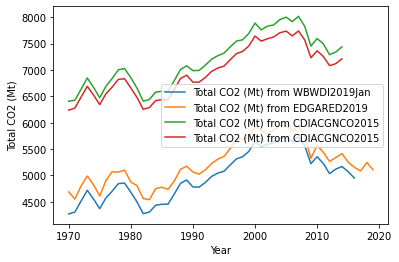

In [24]:
for df in [df_1, df_2, df_3, df_6]:
    plt.plot(df['Year'], df.iloc[:,-1], label = df.columns[-1])
plt.legend()
plt.xlabel('Year')
plt.ylabel('Total CO2 (Mt)')
plt.savefig('Total CO2 vs Year of different dataset.pdf')